In [2]:
%matplotlib inline

user-defined LaTeX commands
$\newcommand{\Er}{\mathcal{E}}$
$\newcommand{\Xset}{\mathcal{X}}$
$\newcommand{\Yset}{\mathcal{Y}}$
$\newcommand{\L}{\mathcal{L}}$
$\newcommand{\l}{\mathcal{l}}$
$\newcommand{\pr}{\mathbb{P}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\D}{\mathbb{D}}$
$\newcommand{\w}{\mathbf{w}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\y}{\mathbf{y}}$
$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\J}{\mathbf{J}}$
$\newcommand{\I}{\mathbf{I}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\S}{\mathbf{S}}$
$\newcommand{\e}{\mathbf{e}}$
$\newcommand{\C}{\mathbf{C}}$
$\newcommand{\K}{\mathbf{K}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\v}{\mathbf{v}}$
$\newcommand{\phivec}{\boldsymbol{\phi}}$
$\newcommand{\sign}{\mathrm{sign}}$
$\newcommand{\F}{\mathcal{F}}$

$\newcommand{\tg}{\mathrm{tg}}$
$\newcommand{\ctg}{\mathrm{ctg}}$
$\newcommand{\arctg}{\mathrm{arctg}}$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from ggplot import *

In [5]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal
from scipy.stats import cauchy
from scipy.stats import expon

### Basic Probability Definitions
**Probability Space** $\left( \Omega, \F, \pr \right)$ : $\Omega = \{\omega_1, \omega_2, \ldots \}$ - sample space, $\F$ - $\sigma$-algebra of events, $\pr$ - probability measure.

**Algebra of events** 
* $\displaystyle{\emptyset \in \F, \Omega \in \F}$
* $\displaystyle{\forall A \in \F : \Omega \setminus A \in \F}$
* $\displaystyle{\forall A_1, A_2 \in \F : A_1 \cup A_2 \in \F}$

**$\sigma$-algebra of events**
* $\displaystyle{\forall B \in {\mathcal B} : \R \setminus B \in {\mathcal B}}$ 
* $\displaystyle{\forall B_1, B_2, \ldots \in {\mathcal B} : \bigcup_i B_i \in {\mathcal B}}$

**Probability Measure**
* $\displaystyle{\pr \left(\emptyset \right) = 0, \pr\left(\Omega \right) = 1}$
* $\displaystyle{\forall A  : 0 \leq \pr\left( A\right) \leq 1}$ 
* $\displaystyle{\forall A_i, A_j; A_i \cap A_j =\emptyset : \pr \left( \bigcup_i A_i \right) = \sum_i \pr\left( A_i \right)}$

**Why $\sigma$-additivity? - Banach-Tarski paradox**
* BT paradox is a theorem, which states the existence of decomposition of a 3-d ball into finite number of disjoint parts, which can be assembled into two identical copies of original ball (can be proven by using axiom of choice).

* Contradicts geometrical intuition: decomposition ought to preserve volume.

* The essence of paradox is that in 3-d space there exist nonmeasurable sets, which do not have "volume" (with additivity property).

**Probability: properties**
* $\displaystyle{\pr(\Omega)=1}$, $\displaystyle{\pr(\emptyset)=0}$.
* $\displaystyle{\pr(A\cup B)=\pr(A)+\pr(B)-\pr(A\cap B)}$.
* If $\displaystyle{A\cap B=\emptyset}$, then $\displaystyle{\pr(A+B)=\pr(A)+\pr(B)}$.
* $\displaystyle{\pr(A) + \pr(\bar{A})=1}$.


**Conditional probability**
Let $\pr(A)>0$, then $\pr(B|A)=\displaystyle\frac{\pr(AB)}{\pr(A)}$.

**Conditional probabilitiy: properties**
* $\pr(A|A)=1$,  $\pr(\emptyset|A)=0$.
* Let $B\supseteq A$, then $\pr(B|A)=1$.
* $\pr(B_1+B_2|A)=\pr(B_1|A)+\pr(B_2|A)$.
* $\pr(B|A)+\pr(\bar{B}|A)=1$.
		But
* $\pr(B|A)+\pr(B|{\bar A})\neq1$, $\pr(B|A)+\pr(\bar{B}|\bar{A})\neq1$.

In [6]:
def I1(x, A):
    if x >= A[0] and x < A[1]:
        return 1
    else:
        return 0

In [7]:
def I2(x, A, B):
    return I1(x, A)*I1(x, B)

In [12]:
n = 1000
X=norm().rvs(size=n)
A = [-1,1]
B = [0,1]
np.array([I1(x, A) for x in X]).sum()/n

0.68400000000000005

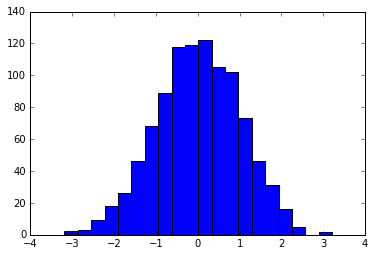

In [13]:
plt.hist(X, bins=20);

In [10]:
def cond_prob(x, A, B):
    Pab = np.array([I2(x, A, B) for x in X]).sum()
    Pa = np.array([I1(x, A) for x in X]).sum()
    if Pa > 0:
        return Pab/Pa
    else:
        return 0

In [14]:
cond_prob(X, A, B)

0.50292397660818711

## Bayes Theorem

**Total Probability Formula**
Let $\{A_k\}_{k=1}^n, A_i\cap A_j =\emptyset, \pr(A_k)>0$, then $\pr(B)=\displaystyle\sum_{k=1}^n\pr(B|A_k)\pr(A_k)$.

**Bayes Theorem - simple form**
Let $H$ stand for *hyphothesis*, $D$ denotes *data*, then $\displaystyle{\pr(H|D)=\frac{\pr(D|H\pr(H)}{\pr(D)}}$

* Prior distribution $\pr(H)$
* Likelihood $\pr(D|H)$
* Posterior distribution $\pr(H|D)$

**Bayes Theorem - more general form**
Let $\{A_k\}_{k=1}^n, A_i\cap A_j =\emptyset, \pr(A_k)>0$, then $\pr(A_k|B)=\displaystyle\frac{\pr(A_k)\pr(B|A_k)}{\displaystyle\sum_{i=1}^n\pr(A_i)\pr(B|A_i)}$.

**Bayes Rule as a hyphothesis testing instrument**
Let $H_1$ and $H_2$ be 2 concurrent hyphothesis. Take hyphothesis $H_k$, for which $\displaystyle{\pr(D|H_k)\pr(H_k)=\pr(DH_k)}$ - joint probability is larger.

In [15]:
n = 1000
x = bernoulli(p=0.55).rvs(size=n)

In [16]:
def joint_prob(x, p, prior):
    likelihood = bernoulli(p=p).logpmf(x).sum()
    return likelihood + prior.logpmf(p)

In [17]:
def accept(x, p1, p2, prior):
    if joint_prob(x, p1, prior) > joint_prob(x, p2, prior):
        return p1
    else:
        return p2

In [18]:
from scipy.stats import rv_discrete

In [19]:
xk = np.array([0.5, 0.55])
pk = np.array([0.5, 0.5])
discrete = rv_discrete(name='discrete', values=(xk, pk))

In [20]:
p = xk
prior = discrete
accept(x, p[0], p[1], prior)

0.55000000000000004

In [21]:
path = np.array([accept(x[:k], p[0], p[1], prior) for k in range(1,len(x))])

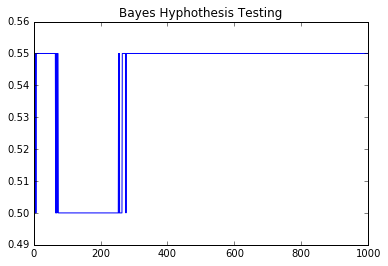

In [22]:
plt.title('Bayes Hyphothesis Testing')
plt.plot(path);

### Random variables

**Random variable**
$\xi: \left(\Omega,\F\right) \rightarrow \left(\R,{\mathcal B}\right)$ random variable is a measurable function:
$\forall B \in {\mathcal B}, A=\xi^{-1}\left(B \right)=\{ \omega: \xi\left(\omega \right)\in B\} \Rightarrow A \in \F$

**Why measurable?**
$x(t)\in {\mathcal C}\left(T\right),\quad x_{\mathbb Q}(t)=
\left\{ \begin{array}{ll}
		x(t), & t\not\in {\mathbb Q};\\
		x(t)+u_t, & t\in {\mathbb Q}, u_t\sim U[-1,+1].
\end{array}\right.$

$\xi_0(t)=x(t),\quad \xi_1(t)=x_{\mathbb Q}(t)\\
\pr\left(\xi_0(t)=\xi_1(t)\right)=\pr\left(t\not\in{\mathbb Q}\right)=1 \Rightarrow \\
1=\pr\left(\xi_0(t)\in {\mathcal C}\left(T\right)\right)=\pr\left(\xi_1(t)\in {\mathcal C}\left(T\right)\right)=0\quad !!!$

### Probability distributions

**Probability distribution**
Probability measure: $\pr_{\xi}\left(B \right)=\pr \left(\xi^{-1}(B) \right), \forall B \in {\mathcal B}$ 

**Probability distribution function**
$F_{\xi}(x)=\pr_{\xi}\left((-\infty, x] \right)=\pr \left(\xi \leq x \right)$

**Discrete Distribution**
Finite or countable set of points ${x_k}$: $\pr(\xi=x_k)=p_k$, $\sum_k p_k=1$.

**Absolutely Continuous Distribution**
$\xi:\quad F\left(x \right)=\int_{-\infty}^x f(u) d u, \quad \int_{-\infty}^{+\infty}p(x) d x = 1$.

### Random Variable Expectation and Variance

**Expectation**
* Discrete r.v.: $\E\xi = \sum_k x_k p_k$.
* Absolutely continuous r.v.: $\E\xi = \int_{-\infty}^{+\infty}x p(x) d x$.

**Variance**
* Discrete r.v.: $\D\xi = \E(\xi-\E\xi)^2=\E\xi^2-\E^2\xi = \sum_k x_k^2 p_k - \left( \sum_k x_k p_k \right)^2$.
* Absolutely continuous r.v.: $\D\xi = \E\left(\xi-\E\xi\right)^2=\E\xi^2 - \E^2\xi=\int_{-\infty}^{+\infty}x^2 p(x) d x - \E^2\xi$.

**Covariance matrix**

Let $\X=(X_1,\ldots,X_n)^T$ - random vector. Let $\E X_i=\mu_i$, then covariance matrix is a matrix with elements:
$\displaystyle{\Sigma_{ij}=\mathrm{cov}(X_i,X_j)=\E(X_i-\mu_i)(X_j-\mu_j)}$

**Correlation matrix**

Let $\X=(X_1,\ldots,X_n)^T$ - random vector. Let $\D X_i=\sigma^2_i$, then correlation matrix is a matrix with elements:
$\displaystyle{\rho_{ij}=\frac{\mathrm{cov}(X_i,X_j)}{\sigma_i\sigma_j}}$

**Bernoulli Distribution**
R.v. $\xi$ has Bernoulli Distribution $\xi\in Ber(p,q)$ if $\pr(\xi=+1)=p, \pr(\xi =-1)=q, p+q=1$.
* Expectation: $\E\xi = p-q$. 
* Variance: $\D\xi = \E\xi^2-\E^2\xi=1-(p-q)^2=4pq$.		

**Binomial Distribution**

R.v. $S_n$ has Binomial Distribution $S_n\in B_n(p,q)$ if $S_n=\displaystyle\sum_{k=1}^n\xi_k, \xi_k\in Ber(p,q)$.

* Expectation: $\E S_n = n(p-q)$. 
* Variance: $\D S_n =4npq$.	

**Random Walk**

$S_n=\displaystyle\sum_{k=1}^n\xi_k$, $\pr(\xi=1)=p$, $\pr(\xi=-1)=1-p$

In [23]:
p = 0.5

In [24]:
xk=np.array([1,-1])
pk=np.array([p, 1-p])
ber = rv_discrete(name='ber', values=(xk, pk))

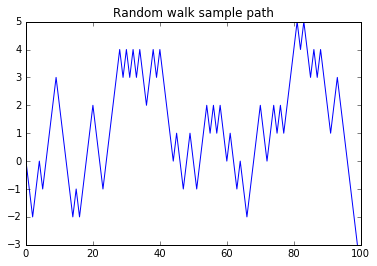

In [27]:
n = 100
x = ber.rvs(size=n)
S = np.cumsum(x)
S = np.insert(S,0,0)[:-1]
plt.plot(S)
plt.title('Random walk sample path');

**Long head-runs in Bernoulli trials**

How to distinguish random head and tail sequence (produced by coin flipping) and artificial one? Longest run of pure heads in $n$ Bernoulli trials (T. Varga, Erdos, Revesz).

**Theorem**

Let $Z_N$ be the longest head-run till $N$, then $\displaystyle \lim_{N\rightarrow\infty}\frac{Z_N}{\log_2 N}=1$ a.s.

In [28]:
def random_walk(p, n):
    xk=np.array([1,-1])
    pk=np.array([p, 1-p])
    ber = rv_discrete(name='ber', values=(xk, pk))
    x = ber.rvs(size=n)
    S = np.cumsum(x)
    return x, np.insert(S,0,0)[:-1]

In [29]:
def longest_head_run(p, n):
    x, S = random_walk(p, n)
    Z = []
    j = 0
    z = 1
    for i in range(len(x)-1):
        if x[i] == x[i+1]:
            z +=1
        else:
            Z.append(z)
            z = 1
    return np.array(Z).max()

In [30]:
p = 0.5
n = 1000
longest_head_run(p, n)

9

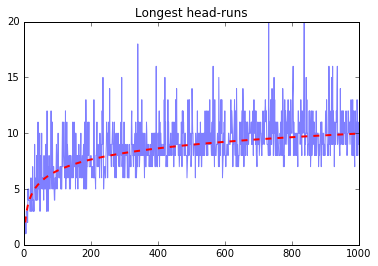

In [31]:
n=1000
N = np.linspace(1,n,n).astype(int)
z = np.array([longest_head_run(p, k) for k in N[3:]])
l = np.log2(N[3:])

plt.title('Longest head-runs')
plt.plot(N[3:],z,alpha=0.5)
plt.plot(N[3:],l,color='red',linewidth=2,linestyle='--');

**Law of Iterated Logarithm**

Law of Iterated Logarithm (Khinchine, 1923): Let $b_n=(2n\log\log n)^{-1/2}$, then $\displaystyle \limsup_{n\rightarrow\infty}b_nS_n=1$ a.s.

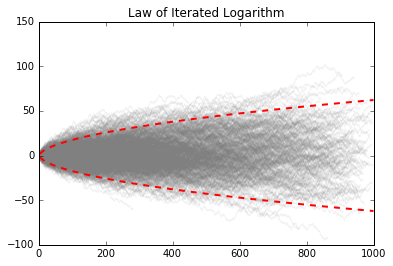

In [32]:
n=1000

plt.title('Law of Iterated Logarithm')
for k in range(3, n):
    _, S = random_walk(p, k)
    plt.plot(S, alpha=0.1, color='grey')

N = np.linspace(1,n,n).astype(int)[3:]
ll = np.sqrt(2*N*np.log(np.log(N)))
plt.plot(N,ll,color='red',linewidth=2,linestyle='--')
plt.plot(N,-ll,color='red',linewidth=2,linestyle='--');

**Geometric distribution**

R.v. $\xi$ has Geometric Distribution $\xi\in G(p)$ if $\pr(\xi=k)=p(1-p)^k=pq^k$.

* Expectation: $\E\xi = \displaystyle\sum_{k=0}^\infty kpq^k=pq\frac{\partial}{\partial q}\left(\displaystyle\sum_{k=1}^\infty q^k\right)=\frac{q}{p}$. 
* Variance: $\D\xi = \E\xi^2-\E^2\xi=\frac{q}{p^2}$.	
* **Lack of memory** property: $\pr\left(\xi>n+k | \xi>n\right)=\pr\left(\xi>k \right)$.	

**Poisson distribution**

R.v. $\xi$ has Poisson Distribution $\xi\in \Pi_\lambda$ if $\pr(\xi=k)=\displaystyle\frac{\lambda^k}{k!}e^{-\lambda}$.

* Expectation: $\E\xi = \displaystyle\sum_{k=0}^\infty k\displaystyle\frac{\lambda^k}{k!}e^{-\lambda}=\lambda e^{-\lambda}\displaystyle\sum_{k=1}^\infty \frac{\lambda^{k-1}}{(k-1)!}=\lambda$, $\E\xi^2=\lambda^2+\lambda$. 
* Variance: $\D\xi = \lambda$.	

**Uniform distribution**

R.v. $\xi$ has Uniform Distribution $\xi\in U_{[a,b]}$ if $f(x)=\displaystyle\frac{1}{b-a}I_{[a,b]}(x)$ and $F(x)=\displaystyle\frac{x-a}{b-a}$.
	
* $\E\xi=\displaystyle\int_a^b\frac{x}{b-a}dx=\displaystyle\frac{a+b}{2}$, 
* $\E\xi^2=\displaystyle\int_a^b\frac{x^2}{b-a}dx=\displaystyle\frac{b^3-a^3}{3(b-a)}$, 
* $\D\xi=\displaystyle\frac{(b-a)^2}{12}$.

**Exponential distribution**

R.v. $\xi$ has Exponential Distribution $\xi\in E_{\lambda} $ if $f(x)=\lambda e^{-\lambda x}I_{(0,+\infty)}(x)$, $F(x)=1-e^{-\lambda x}$.

* $\E\xi^k=\displaystyle\int_0^{\infty}\alpha x^k e^{-\alpha x}dx=\displaystyle\frac{1}{\alpha^k}\int_0^{\infty}(\alpha x)^k e^{-\alpha x}d(\alpha x)=\displaystyle\frac{\Gamma(k+1)}{\alpha^k}=\displaystyle\frac{k!}{\alpha^k}$, 
* $\E\xi=\displaystyle\frac{1}{\alpha}$, $\E\xi^2=\displaystyle\frac{2}{\alpha^2}$, $\D\xi=\displaystyle\frac{1}{\alpha^2}$.
* **Lack of memory** property: $\pr\left(\xi>t+s | \xi>t\right)=\pr\left(\xi>s \right)$.		
* Relation to Geometric distribution: if $\xi\in E_{\lambda}$, then $\eta=[\xi]$ has a Geometric distribution. 

**Cauchy distribution**

R.v. $\xi$ has Cauchy Distribution $\xi\in {\mathcal Cauchy}$ if $f(x)=\displaystyle\frac{1}{\pi(1+x^2)}$, $F(x)=\displaystyle\frac{1}{\pi}\arctan(x)+\frac{1}{2}$.
	
* $\xi_i \sim {\mathcal Cauchy}, i =1,\ldots,n,\quad\Rightarrow\quad S_n=\displaystyle\frac{1}{n}\sum_{i=1}^n\xi_i \sim {\mathcal Cauchy}$. 	

**Normal distribution**

R.v. $\xi$ has Normal Distribution $\xi\in N(a,\sigma^2)$ if $\phi_{a,\sigma^2}(x)=\displaystyle\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{(x-a)^2}{2\sigma^2})$, $\Phi(x)=\displaystyle\frac{1}{\sqrt{2\pi}}\int_{-\infty}^x\exp(-\frac{u^2}{2})du$.

* $\mu_k=\E(\xi-a)^k=\displaystyle\frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^{+\infty}(x-a)^ke^{-\frac{(x-a)^2}{2\sigma^2}}dx=
\displaystyle\frac{\sigma^k}{\sqrt{2\pi}}\int_{-\infty}^{+\infty}u^ke^{-\frac{u^2}{2}}du$. 
* $\mu_{2n+1}=\displaystyle\frac{\sigma^{2n+1}}{\sqrt{2\pi}}\int_{-\infty}^{+\infty}u^{2n+1}e^{-\frac{u^2}{2}}du=\displaystyle\frac{\sigma^{2n+1}}{\sqrt{2\pi}}\int_{-\infty}^{0}u^{2n+1}e^{-\frac{u^2}{2}}du+\displaystyle\frac{\sigma^{2n+1}}{\sqrt{2\pi}}\int_{0}^{+\infty}u^{2n+1}e^{-\frac{u^2}{2}}du=0$.
* $\mu_{2n}=\displaystyle\frac{\sigma^{2n}}{\sqrt{2\pi}}\int_{-\infty}^{+\infty}u^{2n}e^{-\frac{u^2}{2}}du=
\displaystyle\frac{2\sigma^{2n}}{\sqrt{2\pi}}\int_{0}^{+\infty}u^{2n}e^{-\frac{u^2}{2}}du=
(2n-1)\displaystyle\frac{2\sigma^{2n}}{\sqrt{2\pi}}\int_{-\infty}^{+\infty}u^{2n-2}e^{-\frac{u^2}{2}}du=(2n-1)(2n-3)\displaystyle\frac{2\sigma^{2n}}{\sqrt{2\pi}}\int_{-\infty}^{+\infty}u^{2n-4}e^{-\frac{u^2}{2}}du=\dots=
\displaystyle\sqrt{\frac{2}{\pi}}\sigma^{2n}(2n-1)!!\int_0^{\infty}e^{-\frac{u^2}{2}}du=(2n-1)!!\sigma^{2n}$
* $\E\xi = a$, $\D\xi=\sigma^2$.	

### Limit Theorems

* Let $\displaystyle \{\xi_k\}_{k=1}^{\infty}$ be a sequence of i.i.d. Bernoulli r.v.: $\pr(\xi_k=1)=p$, $\pr(\xi_k=0)=1-p=q$. Then $\E\xi_k=p$ and $\D\xi_k=pq$.
* Sum of Bernoulli r.v. $S_n=\xi_1+\ldots +\xi_n$ follows Binomial distribution $B(n,p)$ with $\E S_n=np$ and $\D S_n=npq$. 

**Law of Large Numbers**
For all $\varepsilon>0$ holds $\displaystyle \pr\left(\left|\frac{S_n}{n}-p\right|>\varepsilon\right)\rightarrow 0$ as $n\rightarrow\infty$.

**Strong Law of Large Numbers**
For all $\varepsilon>0$ holds $\displaystyle \pr\left(\sup_{k\geq n}\left|\frac{S_k}{k}-p\right|>\varepsilon\right)\rightarrow 0$ as $n\rightarrow\infty$.

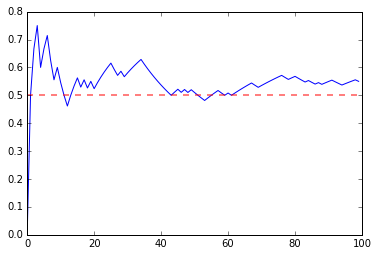

In [33]:
p = 0.5
n = 100
x = bernoulli.rvs(p=p,size=n)
S = np.cumsum(x)
k = np.arange(1,n+1)
plt.plot(S/k)
plt.axhline(y=p, linewidth=2, color = 'red',alpha=0.5, linestyle='--');

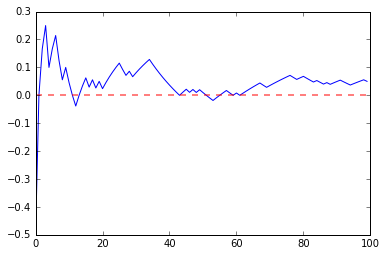

In [35]:
delta = S/k-p
plt.plot(delta)
plt.axhline(y=0, linewidth=2, color = 'red',alpha=0.5, linestyle='--');

In [36]:
def large_deviations_prob(x, level, n=None):
    if n == None:
        n = len(x)//2
    a = np.abs(level)
    return 1.-np.array([I1(xi, [-a, a]) for xi in x[n:]]).sum()/(len(x)-n)

In [37]:
large_deviations_prob(delta, 0.05)

0.30000000000000004

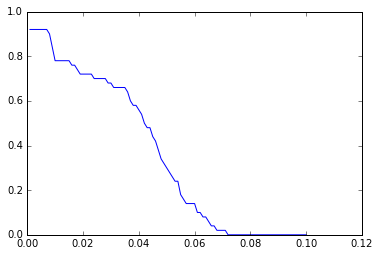

In [38]:
levels = np.linspace(0.001,0.1,100)
dev = [large_deviations_prob(delta, level) for level in levels]
plt.plot(levels, dev);

In [39]:
p = 0.5
n = 100
m = 1000
x = bernoulli.rvs(p=p,size=n*m).reshape(n,m)
S = np.cumsum(x, axis=0)
k = np.arange(1,n+1)
delta = np.divide(S.T, k).T - p

In [40]:
def SLLN_prob(x, level, n=None):
    if n == None:
        n = x.shape[0]//2
    # number of samples
    m = x.shape[1]
    a = np.abs(level)
    X = x[n:,:].T
    return 1. - np.array([I1(np.max(xi), [-a, a]) for xi in X]).sum()/m

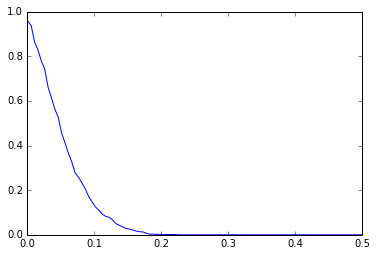

In [41]:
levels = np.linspace(0.001,0.5,100)
dev = [SLLN_prob(delta, level) for level in levels]
plt.plot(levels, dev);

** DeMoivre-Laplace Limit Theorem **

Let $\xi_k: \pr(\xi_k=1)=p, \pr(\xi_k=0)=q$ $\forall k=1,\ldots,n$ and $S_n=\displaystyle\sum_{k=1}^n\xi_k$ be a number of successes,then for fixed $z_1$ and $z_2$ as $n\rightarrow\infty$
$\displaystyle\pr(np+z_1\sqrt{npq}\leq S_n\leq np+z_2\sqrt{npq})\rightarrow \Phi(z_2)-\Phi(z_1)$.
Denote reduced number of successes $\displaystyle S_n^*=\frac{S_n-np}{\sqrt{npq}}$, then theorem can be restated in the form $\displaystyle\pr(z_1\leq S_n^*\leq z_2)\rightarrow \Phi(z_2)-\Phi(z_1)$.

** Central Limit Theorem**

Let $X_1,\ldots,X_n,\ldots$ be i.i.d. r.v. and $\E X_i^2<\infty$, $S_n=\displaystyle\sum_{i=1}^nX_i$, then
$\displaystyle\pr\left(a\leq \frac{S_n-n\E X}{\sqrt{n\D X}}\leq b\right)\rightarrow \Phi(b)-\Phi(a)\phantom{i}\mbox{as}\phantom{i}n\rightarrow\infty$.

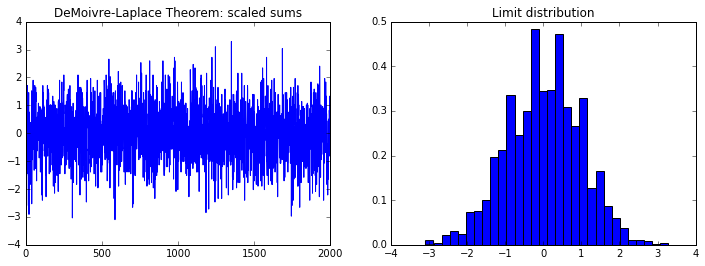

In [42]:
p = 0.5
q = 1. - p
n = 1000
m = 2000
x = bernoulli.rvs(p=p,size=n*m).reshape(n,m)
Sk = np.cumsum(x, axis=0)
k = np.arange(1,n+1)
S = np.divide(Sk.T - (k*p*np.ones((m,n))), np.sqrt(k*p*q)).T

T = -1
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('DeMoivre-Laplace Theorem: scaled sums')
plt.plot(S[T,:])
plt.subplot(122)
plt.title('Limit distribution')
plt.hist(S[T,:], bins=30, normed=True);

In [43]:
dist = expon(loc=0,scale=1)

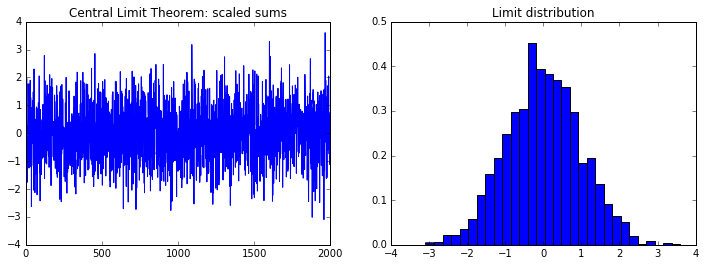

In [44]:
n = 1000
m = 2000
x = dist.rvs(size=n*m).reshape(n,m)
mu = np.mean(x)
sigma = np.std(x)
Sk = np.cumsum(x, axis=0)
k = np.arange(1,n+1)
S = np.divide(Sk.T - (k*mu*np.ones((m,n))), np.sqrt(k)*sigma).T

T = -1
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Central Limit Theorem: scaled sums')
plt.plot(S[T,:])
plt.subplot(122)
plt.title('Limit distribution')
plt.hist(S[T,:], bins=30, normed=True);

** Special case: Cauchy distribution**

In [45]:
dist = cauchy(loc=0,scale=1)

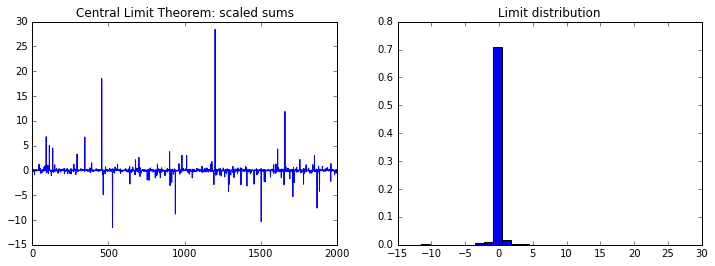

In [46]:
n = 1000
m = 2000
x = dist.rvs(size=n*m).reshape(n,m)
mu = np.mean(x)
sigma = np.std(x)
Sk = np.cumsum(x, axis=0)
k = np.arange(1,n+1)
S = np.divide(Sk.T - (k*mu*np.ones((m,n))), np.sqrt(k)*sigma).T

T = -1
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Central Limit Theorem: scaled sums')
plt.plot(S[T,:])
plt.subplot(122)
plt.title('Limit distribution')
plt.hist(S[T,:], bins=30,normed=True);

### Random variables simulation: Smirnov's Theorem
Let $\eta$ be a continuous r. v. with a c.d.f. $F$.

Define inverse function: $G(u)=\inf \{x: F(x)\geq u\}$,  $0 < u < 1$  inverse function for $F$: $ F(G(x))=x$,  $0<x<1$.

What is the distribution of r.v. $\xi = F(\eta)$? Notice, that $ 0\leq \xi\leq 1$. Derive the c.d.f. of $\xi$:

$H(x)=\pr\left(\xi\leq x\right)=\pr\left(F(\eta)\leq x\right)=\pr\left(\eta \leq G(x)\right)
=F(G(x))=x,\quad 0<x<1 \quad \Rightarrow\quad \xi \sim U_{[0,1]}$.

How this can be used for modeling? Let $\xi \sim U_{[0,1]}$ and $G=F^{-1}$ - inverse for some c.d.f., then $\eta=G(\xi)\sim F$.

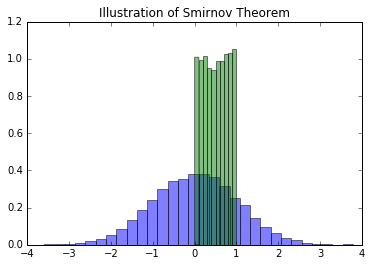

In [47]:
# Motivational example: Smirnov's theorem 
X = norm.rvs(0, 1, 10000)
U = norm.cdf(X)

plt.title('Illustration of Smirnov Theorem')
plt.hist(X, alpha=0.5,bins=30, normed=1)
plt.hist(U, alpha=0.5, normed=1)
plt.show()

**Example**
* R.v. $\xi$ has Exponential Distribution $\xi\in E_{\lambda} $ if $f(x)=\lambda e^{-\lambda x}I_{(0,+\infty)}(x)$, $F(x)=1-e^{-\lambda x}$.
* Inverse function $\displaystyle{G(y)=-\frac{1}{\lambda}\ln(1-y)}$

In [48]:
from scipy.interpolate import interp1d

In [49]:
dist = expon(loc=0, scale=1)

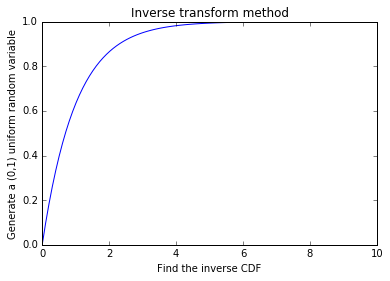

In [50]:
size = 100
a = 0
b = 10
x = np.linspace(a,b,size)
f = dist.pdf(x)
plt.plot(x, dist.cdf(x))
plt.ylabel('Generate a (0,1) uniform random variable')
plt.xlabel('Find the inverse CDF')
plt.title('Inverse transform method');

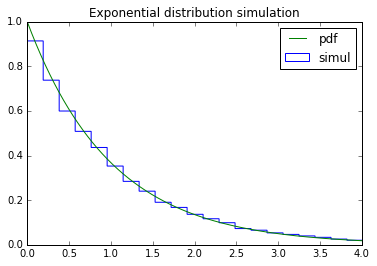

In [54]:
size = 10000
a = 0
b = 10
x = np.linspace(a,b,size)
f = dist.pdf(x)
F = np.cumsum(f)/sum(f)
F = np.insert(F,0,0)[:-1]
# easy way to do the same thing - use cumulative distribution function
#F = dist.cdf(x)
inv_cdf = interp1d(F, x, bounds_error=False, assume_sorted=True)
r = np.random.uniform(0, 1, size)
y = inv_cdf(r)

plt.title('Exponential distribution simulation')
plt.hist(y, bins=50,histtype='step', normed=True, label='simul')
plt.axis([0,4,0,1])
plt.plot(x, f,label='pdf')
plt.legend();

How to model random variable from another distribution?
* Let $\xi\sim F_{\xi}$ and $\eta \sim F_{\eta}$, then $F_{\xi}(\xi)=F_{\eta}(\eta)=Г\sim U_{[0,1]}$,
so $\xi=F_{\xi}^{-1}F_{\eta}(\eta)$.
* Let $\eta \sim f_{\eta}(y)$ and $\eta = \phi(\xi)$, $\xi = \psi(\eta)$, then $ f_{\eta}(y)=f_{\xi}\left(\psi(y)\right)|\psi^{\prime}(y)|$.

**Example**
* R.v. $\xi$ has Exponential Distribution $\xi\in E_{\lambda} $ if $f(x)=\lambda e^{-\lambda x}I_{(0,+\infty)}(x)$, $F(x)=1-e^{-\lambda x}$.

* R.v. $\xi$ has Cauchy Distribution $\xi\in {\mathcal Cauchy}$ if $f(x)=\displaystyle\frac{1}{\pi(1+x^2)}$, $F(x)=\displaystyle\frac{1}{\pi}\arctan(x)+\frac{1}{2}$.

* Let $\xi$ be exponential r.v. $p_{\xi}(x)=\lambda e^{-\lambda x}$ and $\eta$ be a Cauchy r.v. $p_{\eta}(y)=\frac{1}{\pi(1+y^2)}$. 

**How to transform $\xi$ into $\eta$?** In other words, find $\phi$.
* C.d.f.: $F_{\xi}(x)=1-e^{-\lambda x}$, $x>0$ and $F_{\eta}(y)=\frac{1}{\pi}\left(\arctg y +\frac{\pi}{2}\right)$.
* Inverse transform: $y=F_{\eta}(u)=\tg \left( \pi u - \frac{\pi}{2}\right)=-\ctg (\pi u)$.
* Then find $\phi$: $\eta = F_{\eta}^{-1}F_{\xi}(\xi)=-\ctg\left(\pi(1-e^{-\lambda \xi})\right)=\ctg\left(\pi e^{-\lambda \xi} \right)$.

**Practical example: generating gaussian mixture**

$\displaystyle{g(x)=\sum_{i=1}^mw_i\varphi_{\mu_i,\sigma_i}(x)}$, 
where weights sum to unity $\displaystyle{\sum_{i=1}^mw_i=1}$ and $\displaystyle{\varphi_{\mu,\sigma}(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)}$

In [56]:
class gaussian_mixture(object):
    def __init__(self, p, mu, sigma):
        self.p = p
        self.mu = mu
        self.sigma = sigma
        
    def pdf(self, x, p=None, mu=None, sigma=None):
        if p is None:
            p = self.p
        if mu is None:
            mu = self.mu
        if sigma is None:
            sigma = self.sigma
        f = 0
        for b,m,s in zip(p, mu, sigma):
            f += b*np.exp(-(x - m)**2 / (2. * s**2)) / (s * np.sqrt(2.0 * np.pi))
        return f    
    
    def rvs(self, size, p=None, mu=None, sigma=None):
        if p is None:
            p = self.p
        if mu is None:
            mu = self.mu
        if sigma is None:
            sigma = self.sigma
        a = min(mu) - 3.0*max(sigma)
        b = max(mu) + 3.0*max(sigma)
        x = np.linspace(a,b,size)
        f = self.pdf(x, p, mu, sigma)
        F = np.cumsum(f)/sum(f)
        F = np.insert(F,0,0)[:-1]
        inv_cdf = interp1d(F, x, bounds_error=False, assume_sorted=True)
        r = np.random.uniform(0, 1, size)
        return inv_cdf(r)

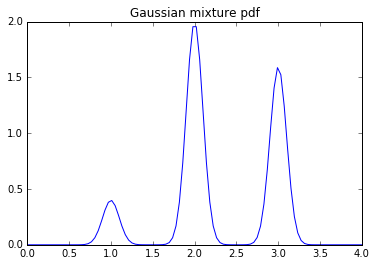

In [57]:
# define some gaussian mixture
p = [0.1,0.5,0.4]
mu = [1.,2.,3.]
sigma = [.1,.1,.1]
x = np.linspace(0,4,100)
mixt = gaussian_mixture(p=p, mu=mu, sigma=sigma)
f = mixt.pdf(x)
plt.title('Gaussian mixture pdf')
plt.plot(x, f);

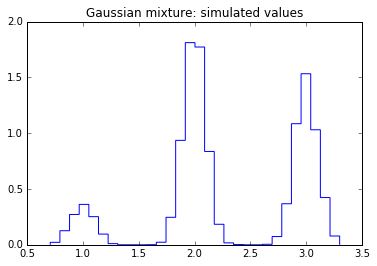

In [58]:
obs = mixt.rvs(size=10000, p=p,mu=mu,sigma=sigma)
plt.title('Gaussian mixture: simulated values')
plt.hist(obs, bins=30, histtype='step', color='blue', normed=True, linewidth=1);

### Generating Random Variables: The Acceptance-Rejection Method
ARM is an indirect method of r.v. generation. Let $f$ be a p.d.f., we are going to simulate. 

**Algorithm:**
* Specify a p.d.f. $h$, which is easy to simulate, and a constant $C\geq 1$, such that $C h(x)\geq f(x)$, $\forall x$.
* Represent $f(x)=C h(x) g(x)$, where $0\leq g(x) \leq 1$.
* **STEP 1.** Generate $U\sim U_{[0,1]}$.
* **STEP 2.** Generate $Y$ from $h(y)$, independent of $U$.
* **STEP 3.** If $U\leq g(Y)$ return $X=Y$. Otherwise, go to **STEP 1**.

**Explanation:**

* Bayes formula: $\displaystyle f_Y(x|U\leq g(Y))=\frac{\pr(U\leq g(Y)|Y=x)h(x)}{\pr(U\leq g(Y))}$
* Then $\displaystyle \pr(U\leq g(Y)|Y=x)=\pr(U\leq g(x))=g(x)$
* and $\displaystyle \pr(U\leq g(Y))=\int\pr(U\leq g(Y)|Y=x)h(x)dx=\int g(x)h(x)dx=\int\frac{f(x)}{C}dx=\frac{1}{C}$.
* Put the last expression into the Bayes formula to get $\displaystyle f_Y(x|U\leq g(Y))=Ch(x)g(x)=f(x)$.		

**Properties:**
* Method efficiency is determined by the acceptance probability $\displaystyle p=\pr(U\leq g(Y))=\frac{1}{C}$.
* Note, that the number $N$ of trials before a succesful pair $(U,Y)$ follows geometric distrbution: $\displaystyle \pr(N=n)=p(1-p)^{n-1}$, $n=1,2,\ldots$, and expected number of trials equal to $\frac{1}{p}=C$.
* Note: it should be easy to generate a r.v. $h(x)$.
* Note: The efficiency $\frac{1}{C}$ shouldn't be too small, which means, that $h(x)$ should be close to $f(x)$.

**Example: simulate normal distribution via ARM**

* To generate $X\sim N(a,\sigma^2)$ it suffice to generate $|Z|$, $Z\sim N(0,1)$, because having independent $U\sim U_{[0,1]}$, set $Z=|Z|$ if $U \leq \frac{1}{2}$ and set $Z=-|Z|$, if $U>\frac{1}{2}$.
* Variable $|Z|$ non-negative with density $\displaystyle f(x)=\frac{2}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$, $x\geq 0$. 
* Choose $h(x)=e^{-x}$, $x\geq 0$ - easy to simulate (using Smirnov's method).
* Denote $\displaystyle g(x)=\frac{f(x)}{h(x)}=\sqrt{\frac{2}{\pi}}e^{x-\frac{x^2}{2}}$. Solve equation $h^{\prime}(x)=0$ to find $C=\sqrt{\frac{2e}{\pi}}$, so that $\displaystyle \frac{f(x)}{Ch(x)}=e^{-\frac{(x-1)^2}{2}}$

**Algorithm: normal distributed variables generator**

The Algorithm for simulating $Z$ is
* **STEP 1.** Simulate $Y\sim E_1$: simulate $U\sim U_{[0,1]}$ and set $Y=-\ln (U)$.
* **STEP 2.** Simulate $U\sim U_{[0,1]}$.
* **STEP 3.** If $\displaystyle U\leq e^{-\frac{(Y-1)^2}{2}}$, set $|Z|=Y$, otherwise go back to **STEP 1**.
* **STEP 4.** Simulate $U\sim U_{[0,1]}$. Set $Z=|Z|$ if $U\leq \frac{1}{2}$, set $Z=-|Z|$, if $U>\frac{1}{2}$.	

Note, that in **STEP 3**, $\displaystyle U\leq e^{-\frac{(Y-1)^2}{2}}$ if and only if $-\ln(U)\geq \frac{(Y-1)^2}{2}$ and since $-\ln(U)$ is exponential at rate 1.

** Algorithm: normal variable generator (simple version)**

The Algorithm for simulating $Z$ (simplified version)

* **STEP 1.** Simulate independent exponentials at rate 1: $Y_1=-\ln(U_1)$, $Y_2=-\ln(U_2)$.
* **STEP 2.** If $Y_2\geq \frac{(Y_1-1)^2}{2}$, set $|Z|=Y_1$, otherwise go back to STEP 1.
* **STEP 3.**  Simulate $U\sim U_{[0,1]}$. Set $Z=|Z|$ if $U\leq \frac{1}{2}$, set $Z=-|Z|$, if $U>\frac{1}{2}$.	
* From the lack memory property of exponential distribution it follows, that $Y=Y_2-\frac{(Y_1-1)^2}{2}\sim E_1$, when $Y_1$ is accepted, independent of $Y_1$. This r.v. can be used to generate another normal value. 

In [189]:
def arm_step():
    u = uniform.rvs(size=3)
    y = -np.log(u[:-1])
    if y[1] >= (y[0]-1)**2/2.:
        if u[-1] <=0.5:
            return y[0]
        else:
            return -y[0]
    else:
        return None

In [190]:
def accept_reject_sampling(n):
    Z = np.zeros(n)
    i = 0
    while i < n:
        z = arm_step()
        if z is not None:
            Z[i] = z
            i+=1
    return Z

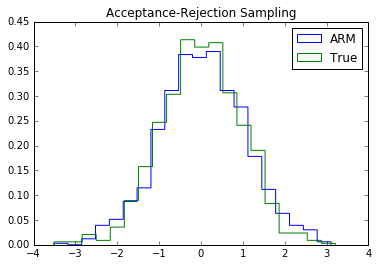

In [191]:
n = 1000
z = accept_reject_sampling(n)
x = norm.rvs(size=n)

plt.title('Acceptance-Rejection Sampling')
plt.hist(z,bins=20, histtype='step',normed=True,label='ARM')
plt.hist(x,bins=20, histtype='step',normed=True,label='True')
plt.legend();

### How to generate covariance and correlation matrices?

**Generating covariance matrix** $\displaystyle{\mathbf{P}\in \R^{m\times m}}$

* Generate random $\displaystyle{\S\in \R^{k, m}}$, for $k>m$;
* Take $\displaystyle{\mathbf{P}=\S^T\S}$

**Generating correlation matrix** $\displaystyle{\mathbf{P}\in \R^{m\times m}}$

* Generate random $\displaystyle{\S\in \R^{k, m}}$, for $k>m$;
* Scale $S$ (center and standardize);
* Take $\displaystyle{\mathbf{P}=\frac{1}{k}\S^T\S}$

In [197]:
from sklearn import preprocessing
# settings
m = 2
k = m + 1
#generate correlation matrix
P = np.random.uniform(0, 1, m * k).reshape(k, m)
P = preprocessing.scale(P)
P = np.dot(P.T, P) / k
P

array([[ 1.        ,  0.00805776],
       [ 0.00805776,  1.        ]])

**How to check positive-definetness?** 
Let $A$ be a positive definite matrix $\displaystyle{x^TAx\geq 0}$, $\forall x$, then all its eigenvalues are non-negative:
$\displaystyle{Av=\lambda v}$, let $x$ be an eigenvector of $A$, then $\displaystyle{x^TAx=\lambda x^Tx > 0 \Rightarrow x^TAx>0 \Rightarrow \lambda>0}$

In [199]:
# check positive definetness
np.linalg.eigvals(P)

array([ 1.00805776,  0.99194224])

## Independence

**Independent Events**
* Events $A$ and $B$ are independent, if $\pr(AB)=\pr(A)\pr(B)$.
* Pairwise independence: $\forall A_i, A_j \in \{A_k\}, \pr(A_i A_j)=\pr(A_i)\pr(A_j)$.
* Jointly indendent events: $\forall k=1,\ldots,n$ and $1\leq i_1<i_2<\ldots<i_k\leq n$, $\pr(A_{i_1}\ldots A_{i_k})=\pr(A_{i_1})\ldots\pr(A_{i_k})$.

**Pairwise and Jointly Independent Events**

Let $\Omega=\{\omega_1, \omega_2,\omega_3,\omega_4\}$ and $A=\{\omega_1, \omega_2\}$, $B=\{\omega_1, \omega_3\}$, $C=\{\omega_1, \omega_4\}$ be pairwise independent, but $\pr(ABC)=\frac{1}{4}\neq(\frac{1}{2})^3=\pr(A)\pr(B)\pr(C)$ (Bernstain's pyramid example).

On the other hand, $\pr(ABC)=\pr(A)\pr(B)\pr(C)$ doesn't imply pairwise independence!

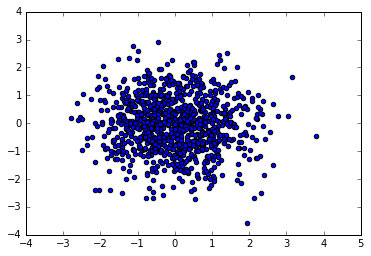

In [200]:
# simulate multivariate normal with P0
from scipy.stats import multivariate_normal
rv = multivariate_normal([0, 0], P)
W = np.zeros((n, 2))
for i in range(0, n):
    W[i,] = rv.rvs()
dfW = pd.DataFrame(W)
plt.scatter(dfW[0], dfW[1])
plt.show()

In [204]:
# Cholesky decomposition of P
from scipy.linalg import cholesky
L = cholesky(P, lower=True)

In [206]:
# check decomposition
np.dot(L, L.T)

array([[ 1.        ,  0.00805776],
       [ 0.00805776,  1.        ]])

In [208]:
# simulation loop (gaussian copula)
from scipy.stats import norm
U = np.zeros((n, m))
for i in range(0, n):
    Z = np.random.normal(0, 1, m)
    X = np.dot(L, Z)
    U[i,] = norm.cdf(X)

In [209]:
# simulation loop (gaussian copula) - easy way
from scipy.stats import multivariate_normal
U = np.zeros((n, m))
for i in range(0, n):
    Z = multivariate_normal.rvs(np.zeros(m), P)
    U[i,] = norm.cdf(Z)

In [210]:
# simulation loop (t-copula)
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import multivariate_normal
nu = 1
U = np.zeros((n, m))
for i in range(0, n):
    c = chi2.rvs(nu, size=1) / nu
    Z = multivariate_normal.rvs(np.zeros(m), P)
    X = Z / np.sqrt(c)
    U[i,] = t.cdf(X, nu)

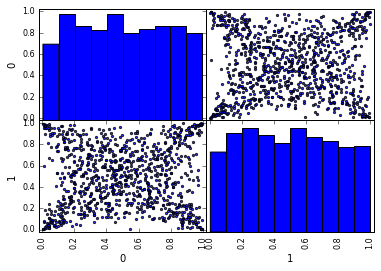

In [211]:
# scatter matrix plot for U
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(U)
scatter_matrix(df, alpha=0.8, diagonal='hist')
plt.show()

In [212]:
# dependent normal r.v. simulation
V = np.zeros((n, m))
for i in range(0, n):
    V[i,] = norm.ppf(U[i,])

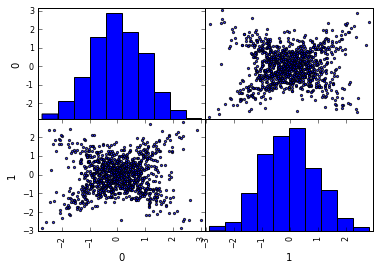

In [213]:
# scatter matrix plot for V
dfV = pd.DataFrame(V)
scatter_matrix(dfV, alpha=0.8, diagonal='hist')
plt.show()